# 1-بارگیری دیتاست

In [15]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'rec.motorcycles', 'sci.space', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

print(f"Number of data: {len(newsgroups.data)}")
print(f"categories: {newsgroups.target_names}")


Number of data: 3963
categories: ['rec.autos', 'rec.motorcycles', 'sci.med', 'sci.space']


# CountVectorizerسوال2-نرمالسازی با 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
print(f"Data dimensions: {X.shape}")

Data dimensions: (3963, 45532)


# سوال3-fit , transform


In [17]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# تقسیم داده‌ها به آموزش و تست (80% آموزش، 20% تست)
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups.data, newsgroups.target, test_size=0.2, random_state=42
)

# نرمال‌سازی با CountVectorizer (روی داده‌های آموزش و تست به طور جداگانه)
count_vectorizer = CountVectorizer(stop_words='english')

#نرمال سازی روی داده های آموزشی
X_train_count = count_vectorizer.fit_transform(X_train)
print(f"shape of X_train_count:{X_train_count.shape}")

#نرمال سازی روی داده های تستی
X_test_count = count_vectorizer.transform(X_test) # فقط transform برای داده های تست استفاده می‌شود
print(f"shape of X_test_count:{X_test_count.shape}")

shape of X_train_count:(3170, 41903)
shape of X_test_count:(793, 41903)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# نرمال‌سازی با CountVectorizer به صورت باینری
binary_vectorizer = CountVectorizer(stop_words='english', binary=True)
X_train_binary = binary_vectorizer.fit_transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

# نرمال‌سازی با TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# نمایش اطلاعات اولیه
print(f"ابعاد داده‌های CountVectorizer باینری (آموزش): {X_train_binary.shape}")
print(f"ابعاد داده‌های CountVectorizer باینری (تست): {X_test_binary.shape}")
print(f"ابعاد داده‌های TfidfVectorizer (آموزش): {X_train_tfidf.shape}")
print(f"ابعاد داده‌های TfidfVectorizer (تست): {X_test_tfidf.shape}")

ابعاد داده‌های CountVectorizer باینری (آموزش): (3170, 41903)
ابعاد داده‌های CountVectorizer باینری (تست): (793, 41903)
ابعاد داده‌های TfidfVectorizer (آموزش): (3170, 41903)
ابعاد داده‌های TfidfVectorizer (تست): (793, 41903)


In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# ساخت مدل Naïve Bayes Multinomial با آلفا برابر 0.1
model = MultinomialNB(alpha=0.1)

# آموزش مدل روی داده‌های آموزش (برای CountVectorizer باینری)
model.fit(X_train_binary, y_train)

# پیش‌بینی بر روی داده‌های تست
y_pred = model.predict(X_test_binary)

# نمایش دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل: {accuracy}")

دقت مدل: 0.9823455233291298


# سوال 6 فاز دوم-مقادیر مختلف الفا

In [23]:
from sklearn.metrics import accuracy_score, classification_report
alpha_values = [1, 0.1, 0.01]

for alpha in alpha_values:
    print(f"\n--- Alpha = {alpha} ---")

    # مدل برای CountVectorizer باینری
    model_binary = MultinomialNB(alpha=alpha)
    model_binary.fit(X_train_binary, y_train)
    y_pred_binary = model_binary.predict(X_test_binary)
    accuracy_binary = accuracy_score(y_test, y_pred_binary)
    report_binary = classification_report(y_test, y_pred_binary)
    print("CountVectorizer (Binary):")
    print(f"Accuracy: {accuracy_binary:.4f}")
    print(f"Classification Report:\n{report_binary}")

    # مدل برای TF-IDF
    model_tfidf = MultinomialNB(alpha=alpha)
    model_tfidf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    report_tfidf = classification_report(y_test, y_pred_tfidf)
    print("\nTF-IDF:")
    print(f"Accuracy: {accuracy_tfidf:.4f}")
    print(f"Classification Report:\n{report_tfidf}")




--- Alpha = 1 ---
CountVectorizer (Binary):
Accuracy: 0.9735
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       195
           1       0.98      0.97      0.97       213
           2       0.99      0.97      0.98       204
           3       0.97      0.98      0.98       181

    accuracy                           0.97       793
   macro avg       0.97      0.97      0.97       793
weighted avg       0.97      0.97      0.97       793


TF-IDF:
Accuracy: 0.9748
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       195
           1       0.97      0.97      0.97       213
           2       0.99      0.97      0.98       204
           3       0.98      0.99      0.99       181

    accuracy                           0.97       793
   macro avg       0.97      0.98      0.98       793
weighted avg       0.97      0.97      0.97       7

# سوال 7 فاز دوم-اموزش و پیش بینی مدل

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# بهترین آلفا را از نتایج مرحله قبل انتخاب کنید (مثلا فرض کنید بهترین آلفا 0.1 باشد)
alpha = 0.1

# مدل برای CountVectorizer باینری
model_binary = MultinomialNB(alpha=alpha) 
model_binary.fit(X_train_binary, y_train)
y_pred_binary = model_binary.predict(X_test_binary)
accuracy_binary = accuracy_score(y_test, y_pred_binary)
report_binary = classification_report(y_test, y_pred_binary)

print("CountVectorizer (Binary):")
print(f"دقت مدل روی داده‌های تست: {accuracy_binary}")
print(f"گزارش طبقه‌بندی:\n{report_binary}")

# مدل برای TF-IDF
model_tfidf = MultinomialNB(alpha=alpha)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("\nTF-IDF:")
print(f"دقت مدل روی داده‌های تست: {accuracy_tfidf}")
print(f"گزارش طبقه‌بندی:\n{report_tfidf}")

CountVectorizer (Binary):
دقت مدل روی داده‌های تست: 0.9823455233291298
گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       195
           1       0.98      0.99      0.98       213
           2       0.99      0.99      0.99       204
           3       0.98      0.99      0.98       181

    accuracy                           0.98       793
   macro avg       0.98      0.98      0.98       793
weighted avg       0.98      0.98      0.98       793


TF-IDF:
دقت مدل روی داده‌های تست: 0.9773013871374527
گزارش طبقه‌بندی:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       195
           1       0.97      0.98      0.98       213
           2       0.98      0.98      0.98       204
           3       0.98      0.98      0.98       181

    accuracy                           0.98       793
   macro avg       0.98      0.98      0.98       793
weighted avg       0.98   

# سوال 8 فاز دوم-ارزیابی مدل

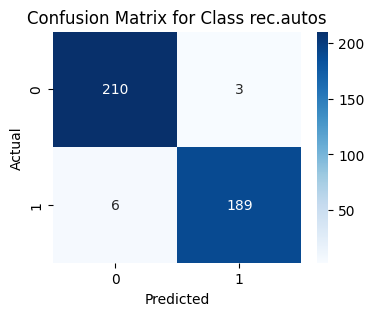

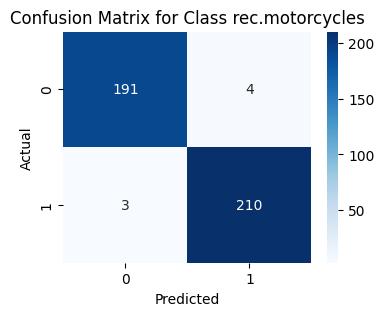


Classification Metrics for Each Class:
------------------------------
Class: rec.autos
 Precision: 0.9844
 Recall: 0.9692
 F1-score: 0.9767
------------------------------
Class: rec.motorcycles
 Precision: 0.9813
 Recall: 0.9859
 F1-score: 0.9836
------------------------------

Average Metrics for Classes 0 and 1:
Average Precision: 0.9828
Average Recall: 0.9776
Average F1-score: 0.9802


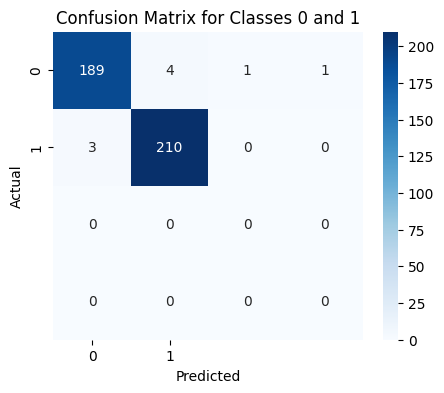


Classification Report for Classes 0 and 1:
                 precision    recall  f1-score   support

      rec.autos       0.98      0.97      0.98       195
rec.motorcycles       0.98      0.99      0.98       213

      micro avg       0.98      0.98      0.98       408
      macro avg       0.98      0.98      0.98       408
   weighted avg       0.98      0.98      0.98       408



In [37]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
selected_classes = [0, 1]
mask = np.isin(y_test, selected_classes)
y_test_selected = y_test[mask]
y_pred_selected = y_pred[mask]

for i in selected_classes:
    cm = confusion_matrix(y_test_selected == i, y_pred_selected == i)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Class {newsgroups.target_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
# محاسبه و چاپ نتایج برای هر کلاس
report = classification_report(y_test_selected, y_pred_selected, output_dict=True, zero_division=0)

print("\nClassification Metrics for Each Class:")
print("-" * 30)
for i in selected_classes:
    class_name = newsgroups.target_names[i]
    precision = report[str(i)]['precision']
    recall = report[str(i)]['recall']
    f1 = report[str(i)]['f1-score']
    print(f"Class: {class_name}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-score: {f1:.4f}")
    print("-" * 30)

# محاسبه میانگین مقادیر برای دو کلاس

avg_precision = np.mean([report[str(i)]['precision'] for i in selected_classes])
avg_recall = np.mean([report[str(i)]['recall'] for i in selected_classes])
avg_f1 = np.mean([report[str(i)]['f1-score'] for i in selected_classes])

print("\nAverage Metrics for Classes 0 and 1:")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")


# محاسبه و نمایش ماتریس درهم ریختگی برای دو کلاس
cm = confusion_matrix(y_test_selected, y_pred_selected)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Classes 0 and 1')
plt.show()

# اصلاح این بخش:
report_avg = classification_report(y_test_selected, y_pred_selected, labels=selected_classes, target_names=[newsgroups.target_names[i] for i in selected_classes], zero_division=0)
print("\nClassification Report for Classes 0 and 1:")
print(report_avg)



# روش گوسین نایو بیز و برنولی نایو بیز


GaussianNB: Accuracy=0.9369


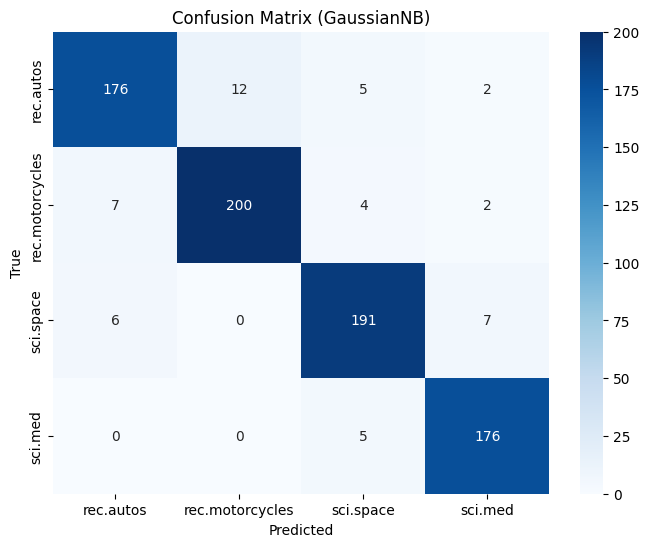

                 precision    recall  f1-score   support

      rec.autos       0.93      0.90      0.92       195
rec.motorcycles       0.94      0.94      0.94       213
      sci.space       0.93      0.94      0.93       204
        sci.med       0.94      0.97      0.96       181

       accuracy                           0.94       793
      macro avg       0.94      0.94      0.94       793
   weighted avg       0.94      0.94      0.94       793

BernoulliNB: Accuracy=0.8991


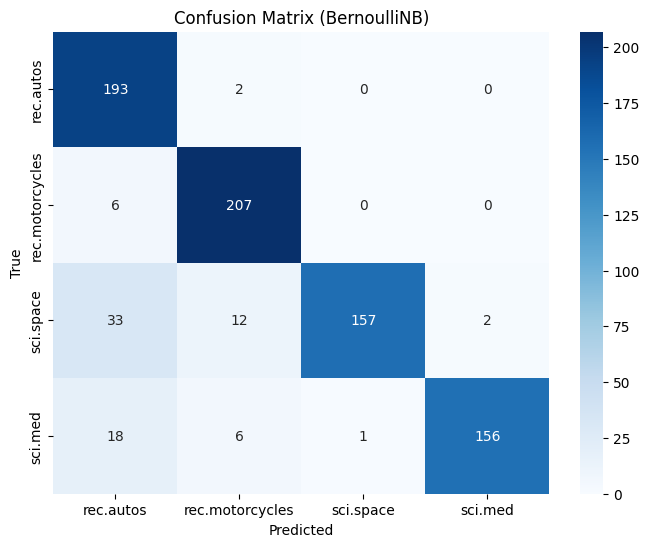

                 precision    recall  f1-score   support

      rec.autos       0.77      0.99      0.87       195
rec.motorcycles       0.91      0.97      0.94       213
      sci.space       0.99      0.77      0.87       204
        sci.med       0.99      0.86      0.92       181

       accuracy                           0.90       793
      macro avg       0.92      0.90      0.90       793
   weighted avg       0.92      0.90      0.90       793



In [38]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# بارگیری دیتاست و انتخاب دسته‌ها
categories = ['rec.autos', 'rec.motorcycles', 'sci.space', 'sci.med']
newsgroup = fetch_20newsgroups(subset='all', categories=categories)

# نرمال‌سازی با CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(newsgroup.data)
y = newsgroup.target

# تقسیم داده‌ها به آموزش و تست
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(newsgroup.data)

count_vectorizer_binary = CountVectorizer(binary=True)
X_count_binary = count_vectorizer_binary.fit_transform(newsgroup.data)

# تقسیم داده‌ها به آموزش و تست
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count_binary, X_test_count_binary, _, _ = train_test_split(X_count_binary, y, test_size=0.2, random_state=42)


# آموزش و ارزیابی GaussianNB
model_gaussian = GaussianNB()
model_gaussian.fit(X_train_tfidf.toarray(), y_train) # GaussianNB نیاز به آرایه دارد
y_pred_gaussian = model_gaussian.predict(X_test_tfidf.toarray())
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print(f"\nGaussianNB: Accuracy={accuracy_gaussian:.4f}")
cm = confusion_matrix(y_test, y_pred_gaussian)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (GaussianNB)')
plt.show()
print(classification_report(y_test, y_pred_gaussian, target_names=categories))

# آموزش و ارزیابی BernoulliNB
model_bernoulli = BernoulliNB()
model_bernoulli.fit(X_train_count_binary, y_train)
y_pred_bernoulli = model_bernoulli.predict(X_test_count_binary)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print(f"BernoulliNB: Accuracy={accuracy_bernoulli:.4f}")
cm = confusion_matrix(y_test, y_pred_bernoulli)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (BernoulliNB)')
plt.show()
print(classification_report(y_test, y_pred_bernoulli, target_names=categories))